# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.autograd import Variable

# CREATING TRAINING DATA SETS

In [2]:
#linear model : y = 7x+5
x_values = [i for i in range(11)]
x_train = np.array(x_values,dtype=np.float32)
x_train = x_train.reshape(-1,1)
x_train

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]], dtype=float32)

In [ ]:
y_values = [7*x+5 for x in x_values]
y_train = np.array(y_values,dtype=np.float32)
y_train = y_train.reshape(-1,1)
y_train

Define a class called linearRegression which inherits nn.Module ( basic Neural Network module ) that contains all the required function

In [4]:
class linearRegression(nn.Module):
    def __init__(self,inputSize,outputSize):
        super(linearRegression,self).__init__()
        self.linear = nn.Linear(inputSize,outputSize)
        
    def forward(self,x):
        out = self.linear(x)
        return out

# CREATING A MODEL

In [28]:
inputDim = 1
outputDim = 1
learning_rate = 0.01
num_iters = 2000

#create a linear regression model 
model = linearRegression(inputDim,outputDim)

In [29]:
#loss function used is Mean squared Error
criterion = nn.MSELoss()
#optimization used is stochastic gradient descent
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

# TRAINING THE MODEL

In [33]:
for epoch in range(num_iters):
    #converting inputs and labels to variables (A varable represents a node in computational graph containg value as well as gradient wrt some scalar value)
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    #Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()
    
    outputs = model(inputs)
    
    #calculating loss
    loss = criterion(outputs,labels)
    
    #get gradients wrt parameters
    loss.backward()
    
    #update parameters
    optimizer.step()
    
    if epoch%100==0:
        print('eopch {} , loss {}'.format(epoch,loss.item()))

eopch 0 , loss 1.3167209544917569e-09
eopch 100 , loss 5.759788757053741e-10
eopch 200 , loss 5.759788757053741e-10
eopch 300 , loss 5.759788757053741e-10
eopch 400 , loss 5.759788757053741e-10
eopch 500 , loss 5.759788757053741e-10
eopch 600 , loss 5.759788757053741e-10
eopch 700 , loss 5.759788757053741e-10
eopch 800 , loss 5.759788757053741e-10
eopch 900 , loss 5.759788757053741e-10
eopch 1000 , loss 5.759788757053741e-10
eopch 1100 , loss 5.759788757053741e-10
eopch 1200 , loss 5.759788757053741e-10
eopch 1300 , loss 5.759788757053741e-10
eopch 1400 , loss 5.759788757053741e-10
eopch 1500 , loss 5.759788757053741e-10
eopch 1600 , loss 5.759788757053741e-10
eopch 1700 , loss 5.759788757053741e-10
eopch 1800 , loss 5.759788757053741e-10
eopch 1900 , loss 5.759788757053741e-10


In [31]:
with torch.no_grad():
    predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

[[ 4.999932]
 [11.999942]
 [18.999952]
 [25.999962]
 [32.999973]
 [39.99998 ]
 [46.999992]
 [54.      ]
 [61.00001 ]
 [68.00002 ]
 [75.00003 ]]


# SUMMARIZING 

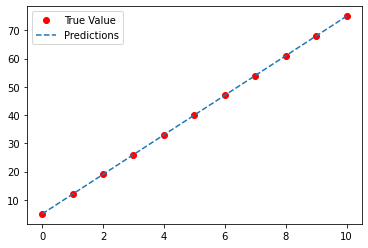

In [35]:
plt.clf()
plt.plot(x_train,y_train,'ro',label='True Value')
plt.plot(x_train,y_train,'--',label='Predictions')
plt.legend(loc='best')
plt.show()